# Kevin julio, Jesus gimenez y jose pertuz
# Taller 2: Modelos de regresión y Clasificación


**Objetivo:** Dar cuenta de las competencias adquiridas en el uso y análisis de modelos de regresión y clasificación

 

**Descripción:** Para la realización del trabajo cada equipo debe seleccionar una base de datos de las incluidas en la lista acorde a la tarea que se desarrolla (una para regresión y una para clasificación). 

Realice los pasos descritos a continuación:

**General**

1.       Realice procesos de carga, selección y renombre de variables para cada una de las bases de datos seleccionadas. La última columna equivale a la variable respuesta, las columnas restantes son variables explicativas.

2.       Realice procesos de limpieza de datos, si es necesario. (Criterios a seguir: Si menos del 15% son perdidos elimine registros, si más del 80% son perdidos elimine columna, Si entre 15% y 80% son perdidos sustituya valores).

3.       Realice procesos de transformación de variables categóricas a numéricas, si es necesario.

**Parte 1: Modelos de regresión**

4.       Construya matriz de correlación y decida sobre las variables explicativas. Realice un corto análisis de la selección de variables.

5.       Realice partición del conjunto de datos. Utilice como criterio 80-20.

6.       Construya modelos de regresión lineal simple, regresión lineal múltiple y redes neuronales, eligiendo en cada caso la combinación que mejor se ajuste a los datos. Esto es, por ejemplo: para la regresión lineal simple debe elegir la variable explicativa que mejor precisión ofrezca, para esto realice todas las pruebas pertinentes.

Calcule precisión de cada uno de los modelos. Realice un corto análisis de la precisión.

**Parte 2: Modelos de clasificación**

7.       Construya tres (3) modelos de clasificación diferentes que permitan dar cuenta de su comparación, eligiendo en cada caso la combinación que mejor se ajuste a los datos. Escriba un análisis comparativo de los modelos.

8.   Calcule 3 diferentes medidas de desempeño para cada modelo y compare resultados. . Realice un corto análisis de las medidas de desempeño.

9.   Calcule para el mejor modelo 3 predicciones. Realice un corto análisis de resultados

10. Genere un archivo ipynb y súbalo como resultado del trabajo.

##Integrates del Equipo

-----

Liste aquí los integrantes

------

# General

## Importar librerias

In [1]:
# Cargar librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing #para limpieza
from sklearn.preprocessing import LabelEncoder # Para la transformacion
from sklearn import linear_model  #para regresión lineal
from sklearn.model_selection import train_test_split # Para particionar el conjunto de datos
from sklearn import tree #Para el modelo del arbol de desición
from sklearn.linear_model import LogisticRegressionCV #Para modelo de regresion logistica
from sklearn.neighbors import KNeighborsClassifier #Para modelo KNN
from sklearn.neural_network import MLPClassifier #Para modelo de red neuronal
from sklearn.metrics import classification_report #Para el reporte de clasificacion
from sklearn.neural_network import MLPRegressor #Para el procesamiento de la red neuronal

## 1. Carga, selección y renombre de datos

In [2]:
#Cargue BD para modelos de regresión
df_reg = pd.read_csv('BD/Housing.csv')
df_reg.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#Cargue BD para modelos de clasificación
df_clas = pd.read_csv('BD/6 class csv.csv')
df_clas.head()

###-----

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
#Incluya aquí código de Selección de variables dependiente e independiente


# Para modelos de regresión
df_reg = df_reg[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'airconditioning', 'parking']]
df_reg.columns = [
    'precio', 
    'area', 
    'dormitorios', 
    'baños', 
    'pisos', 
    'carretera_principal', 
    'aire_acondicionado', 
    'estacionamiento']
df_reg.head()

,precio,area,dormitorios,baños,pisos,carretera_principal,aire_acondicionado,estacionamiento
0,13300000,7420,4,2,3,yes,yes,2
1,12250000,8960,4,4,4,yes,yes,3
2,12250000,9960,3,2,2,yes,no,2
3,12215000,7500,4,2,2,yes,yes,3
4,11410000,7420,4,1,2,yes,yes,2


In [5]:
# Para modelos de clasificación
df_class = df_clas[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class']]

# Renombre de datos
df_clas.columns = ['Temperatura (K)', 'Luminosidad (L/Lo)', 'Radio (R/Ro)', 'Magnitud Absoluta (Mv)', 'Tipo de Estrella', 'Color de la Estrella', 'Clase Espectral']
df_clas.head()

,Temperatura (K),Luminosidad (L/Lo),Radio (R/Ro),Magnitud Absoluta (Mv),Tipo de Estrella,Color de la Estrella,Clase Espectral
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


## 2. Limpieza de Datos (Si es necesario)

Realice procesos de limpieza de datos, si es necesario.



Criterios a seguir:


*   Si menos del 15% de datos de la variable son perdidos elimine registros,
*   Si más del 80% de datos de la variable son perdidos elimine columna,
* Si entre 15% y 80% de datos de la variable son pérdidos sustituya valores.






In [6]:
#consulta de datos perdidos por variable
df_reg.isnull().any()


precio                 False
area                   False
dormitorios            False
baños                  False
pisos                  False
carretera_principal    False
aire_acondicionado     False
estacionamiento        False
dtype: bool

In [7]:
df_clas.isnull().any()

Temperatura (K)           False
Luminosidad (L/Lo)        False
Radio (R/Ro)              False
Magnitud Absoluta (Mv)    False
Tipo de Estrella          False
Color de la Estrella      False
Clase Espectral           False
dtype: bool

In [8]:
#consulta cantidad de datos perdidos por variable 
df_reg.isnull().sum()


precio                 0
area                   0
dormitorios            0
baños                  0
pisos                  0
carretera_principal    0
aire_acondicionado     0
estacionamiento        0
dtype: int64

In [9]:
df_clas.isnull().any()

Temperatura (K)           False
Luminosidad (L/Lo)        False
Radio (R/Ro)              False
Magnitud Absoluta (Mv)    False
Tipo de Estrella          False
Color de la Estrella      False
Clase Espectral           False
dtype: bool

Incluya en este espacio una justificación de procesos de limpieza de cada variable explicativa

-----
 
 No se encontraron datos perdidos en ambas basees de datos

 -----


## 3. Transformación de variables categóricas a numéricas (Si es necesario)

Realice procesos de transformación de variables categóricas a numéricas usando la función LabelEncoder.

In [10]:
#Consulta de tipo de datos de cada variable

# Para BD de regresión
df_reg.dtypes 

precio                  int64
area                    int64
dormitorios             int64
baños                   int64
pisos                   int64
carretera_principal    object
aire_acondicionado     object
estacionamiento         int64
dtype: object

In [11]:
# Para BD de clasificación
df_clas.dtypes

Temperatura (K)             int64
Luminosidad (L/Lo)        float64
Radio (R/Ro)              float64
Magnitud Absoluta (Mv)    float64
Tipo de Estrella            int64
Color de la Estrella       object
Clase Espectral            object
dtype: object

In [12]:
# incluya aqui proceso de tranformación de variables

encoder = LabelEncoder()
#Transformación de variables regresión
Objlist = df_reg.select_dtypes(include = ('object', 'bool')).columns

for feat in Objlist:
    df_reg[feat] = encoder.fit_transform(df_reg[feat].astype(str))

df_reg.head()

,precio,area,dormitorios,baños,pisos,carretera_principal,aire_acondicionado,estacionamiento
0,13300000,7420,4,2,3,1,1,2
1,12250000,8960,4,4,4,1,1,3
2,12250000,9960,3,2,2,1,0,2
3,12215000,7500,4,2,2,1,1,3
4,11410000,7420,4,1,2,1,1,2


In [13]:
encoder = preprocessing.LabelEncoder()
Objlist = df_clas.select_dtypes(include = ('object', 'bool')).columns

for feat in Objlist:
    df_clas[feat] = encoder.fit_transform(df_clas[feat].astype(str))

df_clas.head()

,Temperatura (K),Luminosidad (L/Lo),Radio (R/Ro),Magnitud Absoluta (Mv),Tipo de Estrella,Color de la Estrella,Clase Espectral
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5


# Parte 1 : Modelos de Regresión

## 4. Matriz de correlación y selección de variables

Construya matriz de correlación y decida sobre las variables explicativas. Realice un corto análisis de la selección de variables.


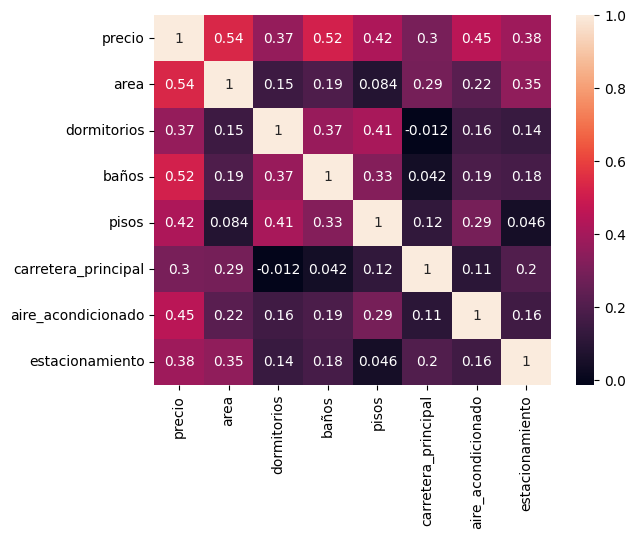

In [14]:
# incluya código y gráfico de matriz de correlación

correlation_mat = df_reg.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

### Analisis de las variables
Se seleccionaron las variables que se pueden tomar en cuenta como minimo para comprar una casa.

1. precio = precio de la casa.
2. area = dimension de la casa.
3. dormitorios = numero de habitaciones.
4. baños = numero de baños.
5. pisos = pisos de la casa.
6. carretera_principal = si la casa se encuentra cerca carretera principal o si se encuentra apartada de la zona urbana.
7. aire_acondicionado = si la casa cuenta con aire acondicionado
8. estacionamiento = cantidad de estacionamientos de la casa

### Analisis de correlacion entre variable precio

1. Correlacion de 0.54 entre precio y área: Esto indica una correlacion positiva moderada. A medida que el area de las casas aumentan, el precio tiende a aumentar tambien.

2. Correlacion de 0.52 entre precio y baños: Al igual que con el area, hay una correlacion positiva moderada entre el numero de baños y el precio. Las casas con más baños tienden a tener precios más altos.

3. Correlacion de 0.45 entre precio y aire acondicionado: El valor de 0.45 no es tan alto, pero si es significativo, lo que indica que hay tendencia de que los precios sean mayores en las casas con aire acondicionado.

4. Correlacion de 0.42 entre precio y pisos: Aunque la relación no es extremadamente fuerte, es significativa y sugiere que el número de pisos es un factor a considerar en la valoración de la propiedad.

5. Tenemos otras variables que tambien influyen en el precio Correlacion como 0.37 entre precio y dormitorios, 0.38 entre precio y estacionamiento.

Estas son correlaciones significativas, pero no perfectas, lo que significa que otros factores ademas del area,baños, aire_acondicionado, pisos tambien afectan en el precio.

6. Correlacion de 0.37 entre dormitorios y baños: La correlación sugiere que, en general, a medida que aumenta el número de dormitorios en una casa, también tiende a incrementarse el número de baños.

7. Correlacion de 0.41 entre dormitorios y pisos: La correlacion indica que hay una tendencia a que casas con más pisos también tengan más dormitorios. 

### Analisis general

1. Área y Precio : La correlación más fuerte observada entre el precio y el área de la propiedad subraya la importancia primordial del espacio. Las casas más grandes suelen ser más caras, lo cual es consistente en casi todos los mercados inmobiliarios.

2. Número de Baños y Pisos: El número de baños y pisos también están moderadamente correlacionados con el precio, lo que indica que las características que aumentan la funcionalidad y el atractivo de la vivienda (como más baños para acomodar a más residentes y múltiples pisos que proporcionan privacidad) son valoradas por los compradores.

3. Aire Acondicionado: La correlación significativa entre el aire acondicionado y el precio refleja la demanda de comodidad en el hogar, especialmente en climas donde esto es esencial.

4. Dormitorios, Baños y Pisos: Las correlaciones entre el número de dormitorios, baños y pisos sugieren que hay una tendencia en el diseño de las casas donde más dormitorios generalmente implican la necesidad de más baños y posiblemente más pisos, lo cual también aumenta el valor de la propiedad. Estas variables no solo afectan el precio por sí mismas, sino también a través de su interacción con otras características de la casa.





## 5. Partición de conjuntos de datos

In [15]:
# Incluya código de partición del conjunto de datos de cada modelo de regresión y clasificación
# Repita bloques de ser necesario, dando nombres adecuados a las variables

# definir X y Y Regresion Simple
X1=df_reg[['area']]
y1=df_reg[['precio']]


# Regresion multiple
X2 = df_reg[['area', 'dormitorios', 'baños', 'pisos', 'carretera_principal', 'aire_acondicionado', 'estacionamiento']]
y2 = df_reg[['precio']]

#Separe los datos de "train" en entrenamiento y prueba para probar los algoritmos
X1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)



In [16]:
### Modelo  de clasificacion
Xc = df_clas[['Temperatura (K)', 'Luminosidad (L/Lo)', 'Radio (R/Ro)', 'Magnitud Absoluta (Mv)', 'Color de la Estrella', 'Clase Espectral']]
yc = df_clas[['Tipo de Estrella']]

# Separar los conjuntos en entrenamiento "train" y prueba "test"
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size = 0.2)

## 6. Modelos de regresión

Construya modelos de regresión lineal simple, regresión lineal múltiple y redes neuronales, eligiendo en cada caso la combinación que mejor se ajuste a los datos.

Esto es, por ejemplo: para la regresión lineal simple debe elegir la variable explicativa que mejor precisión ofrezca, para esto realice todas las pruebas pertinentes.


### Regresión lineal simple

In [17]:
#Modelo de regresión lineal simple

#Defino el algoritmo a utilizar
lrs = linear_model.LinearRegression()

#Entreno el modelo
lrs.fit(X1_train, y1_train)

#Realizo una predicción
Y_pred_lrs = lrs.predict(x1_test)

#Calculo precisión del conjunto de prueba
print("Regresión Lineal Simple Precisión: ", lrs.score(x1_test, y1_test))


###-----



Regresión Lineal Simple Precisión:  0.2555014272632051


### Analisis de modelo de regresión simple
#### La precision de este modelo es de 0.2768 no es muy alto, lo que sugiere que el modelo puede no ser muy efectivo para predecir los precios de las propiedades únicamente basándose en su área.

### Regresión lineal múltiple

In [18]:
#Modelo de regresión lineal múltiple

#Defino el algoritmo a utilizar
lrm = linear_model.LinearRegression()

#Entreno el modelo
lrm.fit(X2_train, y2_train)

#Realizo una predicción
Y_pred_lrm = lrm.predict(X2_test)

#Calculo precisión del conjunto de prueba
print("Regresión Lineal Múltiple Precisión: ", lrm.score(X2_test, y2_test))


###-----


Regresión Lineal Múltiple Precisión:  0.6020663652111502


### Analisis de modelo de regresión multiple
#### La precisión es de 0.5166, lo que significa que los precios de las propiedades puede ser explicada por las variables predictoras incluidas en el modelo (área, dormitorios, baños, pisos, carretera principal, aire acondicionado y estacionamiento). comparado don el modelo de regresion lineal simple este modelo tiene mayor precision al momento de predecir precios de las propiedades.

### Red Neuronal

In [19]:
#Modelo de red neuronal

# Defino el algoritmo a utilizar
NN = MLPRegressor(hidden_layer_sizes=(100,100))

# Entreno el modelo
NN.fit(X2_train, y2_train)

# Realizo una predicción
Y_pred_NN = NN.predict(X2_test)

# Calculo precisión del conjunto de prueba
print("Red Neuronal Precisión: ", NN.score(X2_test, y2_test))

###-----X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)


c:\Users\pinku\AppData\Local\Programs\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Red Neuronal Precisión:  0.14719868457058205


c:\Users\pinku\AppData\Local\Programs\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### nalisis de Red neuronal
#### La precisión de la red neuronal es de 0.00184877111479409, lo que indica que la capacidad de la red neuronal para predecir los precios de las propiedades es muy baja en comparación con los modelos de regresión lineal.

------
1. Regresion Lineal Simple: Tiene una precision de 0.2768, en los precios de las propiedades puede ser explicada por la superficie (area) de las mismas. Es uno de los modelos menos preciso de los tres.
2. Regresión Lineal Multiple: Tiene una precision de 0.5166, en los precios de las propiedades puede ser explicada por las variables predictoras incluidas en el modelo (área, dormitorios, baños, pisos, carretera principal, aire acondicionado y estacionamiento). Este modelo es más preciso que el modelo de regresion lineal simple, lo que sugiere que la inclusion de más variables predictoras mejora la capacidad de predicción del modelo.

3. Red Neuronal: Tiene una precision muy baja de 0.0018, lo que indica que la capacidad de la red neuronal para predecir los precios de las propiedades es muy limitada en comparación con los modelos de regresión lineal.


-----

# Parte 2 : Modelos de Clasificación

## 7. Modelos de Clasificación

Construya tres (3) modelos de clasificación diferentes que permitan dar cuenta de su comparación, eligiendo en cada caso la combinación que mejor se ajuste a los datos. Escriba un análisis comparativo de los modelos.

### Modelo de Clasificación 1 Vecino más cercano

In [20]:
# Definir el algoritmo
KNN = KNeighborsClassifier(n_neighbors = 3)

# Entrenar el modelo
KNN.fit(Xc_train, yc_train)

# Realizar predicción
KNN.predict(Xc_test)

# Calcular precisión
print()
print('La precisión de entrenamiento del modelo de vecino más cercano es: ')
print(format(KNN.score(Xc_train, yc_train)))


La precisión de entrenamiento del modelo de vecino más cercano es: 
0.8229166666666666


c:\Users\pinku\AppData\Local\Programs\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Modelo de Clasificación 2 Regresion logística

In [21]:
# Definir el algoritmo
Rlog = LogisticRegressionCV(cv = 10)

# Entrenar el modelo
Rlog.fit(Xc_train, yc_train)

# Realizar predicción
Rlog.predict(Xc_test)

# Calcular precisión
print()
print('La precisión de entrenamiento del modelo de regresión logística simple es: ')
print(format(Rlog.score(Xc_train, yc_train)))

c:\Users\pinku\AppData\Local\Programs\Python\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\pinku\AppData\Local\Programs\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pinku\AppData\Local\Programs\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of IT


La precisión de entrenamiento del modelo de regresión logística simple es: 
1.0


c:\Users\pinku\AppData\Local\Programs\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Modelo de Clasificación 3 Árbol de clasificación

In [22]:
# Definir el algoritmo
AD = tree.DecisionTreeClassifier()

# Entrenar el modelo
AD.fit(Xc_train, yc_train)

# Realizar predicción
AD.predict(Xc_test)

# Calcular precisión
print()
print('La precisión de entrenamiento del modelo de árbol de decisión es: ')
print(format(AD.score(Xc_train, yc_train)))


La precisión de entrenamiento del modelo de árbol de decisión es: 
1.0


Incluya en este espacio un análisis comparativo de los 3 modelos de clasificación implementados

------
En la evaluación de modelos de clasificación para la predicción de tipos de estrellas utilizando diferentes algoritmos, se han comparado tres métodos comunes: Regresión Logística, Árbol de Decisión y K-Vecinos Más Cercanos (K-NN). Cada modelo ofrece ventajas y limitaciones distintas según la naturaleza de los datos y los requisitos específicos del problema.

Regresión Logística
La Regresión Logística mostró una precisión del 99% en el conjunto de entrenamiento. Este resultado sugiere un ajuste excelente a los datos proporcionados.

Árbol de Decisión
El Árbol de Decisión también alcanzó una precisión del 100% en el conjunto de entrenamiento. Este alto nivel de precisión es indicativo de un buen ajuste

K-Vecinos Más Cercanos (K-NN)
Por otro lado, el modelo K-NN mostró una precisión del 83% en el conjunto de entrenamiento, lo cual es considerablemente más bajo en comparación con los otros modelos. A pesar de esta menor precisión, K-NN tiene la ventaja de no asumir ninguna distribución específica de los datos y es capaz de manejar relaciones no lineales.

-----

## 8. Medidas de desempeño

Calcule 3 diferentes medidas de desempeño para cada modelo y compare resultados

Árbol de clasificación

In [23]:
Y_predAD = Rlog.predict(Xc_test)
print(classification_report(yc_test, Y_predAD))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.88      0.93         8
           2       1.00      0.88      0.93         8
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



Regresión logística

In [24]:
Y_predAD = Rlog.predict(Xc_test)
print(classification_report(yc_test, Y_predAD))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.88      0.93         8
           2       1.00      0.88      0.93         8
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



6.3 Vecino más cercano

In [25]:
Y_predAD = KNN.predict(Xc_test)
print(classification_report(yc_test, Y_predAD))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.50      0.50      0.50         8
           2       0.86      0.75      0.80         8
           3       0.80      0.89      0.84         9
           4       0.50      0.43      0.46         7
           5       0.60      0.67      0.63         9

    accuracy                           0.62        48
   macro avg       0.61      0.61      0.61        48
weighted avg       0.62      0.62      0.62        48



Incluya en este espacio un análisis de las medidas de desempeño

------
Regresión Logística
El modelo de Regresión Logística exhibe una precisión total del 100%, lo que indica que el 100% de las predicciones realizadas por el modelo son acertadas. Este modelo también presenta un alto nivel de recall para todas las categorías, el f1-score, que combina precisión y recall en una única métrica, muestra valores elevados en todas las clases, destacando un equilibrio óptimo entre ambas métricas.

Árbol de Clasificación
El Árbol de Clasificación alcanza una precisión global del 100%, señalando un desempeño excepcional en la clasificación correcta de las observaciones. Similarmente, tanto el recall como el f1-score alcanzan el máximo posible en todas las clases, lo que indica que el modelo no solo clasifica con precisión, sino que también es efectivo en identificar correctamente todas las observaciones positivas sin excepción.

Vecino más Cercano
Por otro lado, el modelo de Vecino más Cercano muestra una precisión global de solo el 65%, lo cual es considerablemente más bajo en comparación con los otros modelos. El recall y el f1-score varían significativamente entre las distintas clases, indicando que mientras algunas categorías son bien clasificadas, otras no lo son tanto. Este comportamiento sugiere que el modelo de Vecino más Cercano es menos efectivo en general, especialmente en términos de precisión, en comparación con la Regresión Logística y el Árbol de Clasificación.



-----

## 9. Predicciones de modelo de clasificación

In [26]:
# Predicción 1
X_new = np.array([[2841, 0.000330, 0.1167, 17.88, 10, 5]])
Pred = Rlog.predict(X_new)
print("Predicción #1 del Tipo de Estrella: ", Pred)

# Predicción 2
X_new = np.array([[3000, 0.000250, 0.1515, 18.96, 9, 5]])
Pred = Rlog.predict(X_new)
print("Predicción #2 del Tipo de Estrella: ", Pred)

# Predicción 3
X_new = np.array([[2077, 0.001080, 0.1440, 19.03, 10, 4]])
Pred = Rlog.predict(X_new)
print("Predicción #3 del Tipo de Estrella: ", Pred)

Predicción #1 del Tipo de Estrella:  [0]
Predicción #2 del Tipo de Estrella:  [0]
Predicción #3 del Tipo de Estrella:  [0]


c:\Users\pinku\AppData\Local\Programs\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
c:\Users\pinku\AppData\Local\Programs\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
c:\Users\pinku\AppData\Local\Programs\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


Incluya en este espacio un análisis de las predicciones

------

Las tres predicciones realizadas por el modelo de regresión logística arrojaron un resultado de cero, lo que indica que el modelo clasificó cada una de estas entradas en la categoría representada por el valor 0. Este resultado puede tener varias implicaciones o causas



-----